# 10. Pandas

Pandas es un paquete de Python que proporciona estructuras de datos __rápidas, flexibles y expresivas__ diseñadas para que trabajar con datos __"relacionales" o "etiquetados"__ sea fácil e intuitivo, es una de las librerias más usadas debido a su potencia y además es de código abierto . Su función es ser una herramienta de alto nivel para realizar__ analisis de datos__ en el mundo real. 

Pandas es muy adecuado para muchos tipos diferentes de datos:

- Datos tabulares con columnas de tipo heterogéneo, como en una tabla de SQL o una hoja de cálculo de Excel
- Datos de series de tiempo ordenados y no ordenados (no necesariamente de frecuencia fija).
- Datos de matriz arbitraria (homogéneamente tipados o heterogéneos) con etiquetas de fila y columna
- Cualquier otra forma de conjuntos de datos observacionales / estadísticos. Los datos realmente no necesitan ser etiquetados en absoluto para ser colocados en una estructura de datos pandas.

Pandas ofrece las siguientes estructuras de datos:

* __Series__: Son arrays unidimensionales con indexación (arrays con índice o etiquetados), similar a los diccionarios. Pueden generarse a partir de diccionarios o de listas.
 
* __DataFrame__: Son estructuras de datos similares a las tablas de bases de datos relacionales como SQL.
 
* __Panel, Panel4D y PanelND__: Estas estructuras de datos permiten trabajar con más de dos dimensiones. Dado que es algo complejo y poco utilizado trabajar con arrays de más de dos dimensiones no trataremos los paneles en estos tutoriales de introdución a Pandas.

Aquí están algunas de las cosas que los pandas hacen bien:

- Manejo fácil de __datos faltantes__ (representados como __NaN__) en punto flotante así como datos de punto no flotante.
- Cambios de tamaño: las columnas se pueden __insertar y eliminar__ de DataFrame y objetos de dimensiones superiores.
- __Alineación automática y explícita de datos__: los objetos pueden alinearse explícitamente con un conjunto de etiquetas, o el usuario puede simplemente ignorar las etiquetas y dejar que Series, DataFrame, etc. alineen automáticamente los datos en cálculos.
- Potente y flexible al __agrupar por funcionalidad__ para realizar operaciones __split-apply-combine__ en conjuntos de datos, tanto para la agregación como para la transformación de datos.
- __Facilita la conversión__ de datos desiguales y diferenciados en otras estructuras de datos Python y NumPy en objetos DataFrame.
- Recorte inteligente basado en __slicing, fancy indexing, y subsetting__ de grandes conjuntos de datos.
- Robustas herramientas de IO para cargar datos de __archivos planos__ (CSV y delimitado), archivos de Excel, bases de datos y guardar / cargar datos desde el formato __HDF5 ultrarrápido__.
- __Funciones específicas de series de tiempo__: generación de intervalos de fechas y conversión de frecuencia, estadísticas de ventanas en movimiento, regresiones lineales de ventanas en movimiento, cambio de fecha y retraso, etc.

Para los científicos de datos, el trabajo con datos suele dividirse en múltiples etapas: muestrear y limpiar los datos, analizarlos o modelarlos, y luego organizar los resultados del análisis en una forma adecuada para representación gráfica o tabular. Pandas es la herramienta ideal para todas estas tareas.

Otras notas:

- Pandas es __rápido__. Muchos de los bits algorítmicos de bajo nivel se han modificado extensamente en el código de Cython. Sin embargo, como con cualquier otra cosa, la generalización suele sacrificar el rendimiento. Así que si usted se centra en una característica para su aplicación que puede ser capaz de crear una herramienta especializada más rápida.
- Pandas es una dependencia de __statsmodels__, por lo que es una parte importante del ecosistema de computación estadística en Python.
- Pandas ha sido ampliamente utilizado en la producción en __aplicaciones financieras__.

Ahora empecemos importando pandas:

In [1]:
# Forma convencional de importar pandas:
import pandas as pd

In [2]:
# Importando matplotlib para graficar 
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)

## Estructuras de Datos
------------------------------

### Series

La estructura de datos de Series en Pandas es una matriz etiquetada unidimensional.

- Los datos de la matriz pueden ser de cualquier tipo (números enteros, cadenas, números de punto flotante, objetos Python, etc.).

- Los datos dentro de la matriz son homogéneos.

- Los datos pueden ser listas, arrays, o un diccionario.


In [3]:
# Constructor de serie con datos como una lista de enteros
s1 = pd.Series([33, 19, 15, 89, 11, -5, 9])
s1

0    33
1    19
2    15
3    89
4    11
5    -5
6     9
dtype: int64

In [4]:
# Tipo de serie es la serie pandas
type(s1)

pandas.core.series.Series

In [5]:
# Recupera los valores de la serie 
s1.values

array([33, 19, 15, 89, 11, -5,  9], dtype=int64)

In [6]:
# Tipo de valores de datos es NumPy ndarray
type(s1.values)

numpy.ndarray

![Alt text](../images/series.jpg "Optional title")

In [7]:
# Define los datos e indices como listas
data1 = [33, 19, 15, 89, 11, -5, 9]
index1 = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Crea la serie 
s2 = pd.Series(data1, index=index1)

s2

Mon    33
Tue    19
Wed    15
Thu    89
Fri    11
Sat    -5
Sun     9
dtype: int64

![Alt text](../images/series2.jpg "Optional title")

In [8]:
# También podemos dar etiquetas significativas a los datos de la serie y el índice

s2.name='Daily Temperatures'
s2.index.name='Weekday'

s2

Weekday
Mon    33
Tue    19
Wed    15
Thu    89
Fri    11
Sat    -5
Sun     9
Name: Daily Temperatures, dtype: int64

La representación más general de una serie es como un almacén de key-values ordenado.

- El orden es representado por el offset.
- El valor-clave es una asignación de índice o etiqueta a los valores de matriz de datos.
- Indice como "offset" o "posición" vs índice como "etiqueta" o "clave".

![Alt text](../images/series3.jpg "Optional title")

Al ser las series de tipo__NumPy-ndarray__ podemos efectuar las mismas operaciones que hicimos en Numpy:

In [9]:
s2 * 2

Weekday
Mon     66
Tue     38
Wed     30
Thu    178
Fri     22
Sat    -10
Sun     18
Name: Daily Temperatures, dtype: int64

In [10]:
# Podemos usar el slicing usando la posicion
s2[0:3]

Weekday
Mon    33
Tue    19
Wed    15
Name: Daily Temperatures, dtype: int64

In [11]:
# Tambien podemos usar slicin usando sus etiquetas(labes)
s2['Mon':'Wed']

Weekday
Mon    33
Tue    19
Wed    15
Name: Daily Temperatures, dtype: int64

#### Uniendo Series

In [12]:
import numpy as np

s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

housemkt = pd.concat([s1, s2, s3], axis=1)
housemkt.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)

housemkt.head()

,bedrs,bathrs,price_sqr_meter
0,3,1,11409
1,3,2,20287
2,3,1,27019
3,3,2,20772
4,3,1,28205


### Dataframes

La estructura de datos de DataFrame en Pandas es una matriz etiquetada bidimensional.

- Los datos de la matriz pueden ser de cualquier tipo (números enteros, cadenas, números de punto flotante, objetos Python, etc.).
- Los datos dentro de cada columna son homogéneos
- De forma predeterminada, Pandas crea un índice numérico para las filas en la secuencia 0 ... n

![Alt text](../images/dataframe.jpg "Optional title")

In [13]:
import datetime

# Creamos una lista de fechas desde 12-01 to 12-10
dt = datetime.datetime(2016,12,1)
end = datetime.datetime(2016,12,10)
step = datetime.timedelta(days=1)
dates = []

# Rellenar la lista
while dt < end:
    dates.append(dt.strftime('%m-%d'))
    dt += step

In [14]:
dates

['12-01',
 '12-02',
 '12-03',
 '12-04',
 '12-05',
 '12-06',
 '12-07',
 '12-08',
 '12-09']

In [15]:
d = {'Date': dates, 'Arequipa' : [15,19,15,11,9,8,13,14,16], 'Puno': [-2,0,2,5,7,-5,-3,4,7], 'Lima':[20,18,23,19,25,27,23,29,30]}
temps = pd.DataFrame(d)
temps

,Arequipa,Date,Lima,Puno
0,15,12-01,20,-2
1,19,12-02,18,0
2,15,12-03,23,2
3,11,12-04,19,5
4,9,12-05,25,7
5,8,12-06,27,-5
6,13,12-07,23,-3
7,14,12-08,29,4
8,16,12-09,30,7


## Leyendo data de un archivo csv 

Puede leer datos de un archivo __CSV__ (comma-separated values) utilizando la función read_csv. 

Vamos a buscar algunos datos de avistamientos de ovnis.

In [16]:
# Leyendo el dataset de reportes de avistamientos en un dataframe
ufo = pd.read_csv('../data/ufo.csv')

In [17]:
# Examinamos las 5 primeras filas
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


Documentacion de [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

También podemos leer data de una web, en este caso leeremos un archivo __TSV__ (Tabular-separated-values): con __read_table__:

In [18]:
# Leyendo el dataset de ordenes de Chipotle de una URL y guardar los resultados en un dataframe
orders = pd.read_table('http://bit.ly/chiporders')

#mostramos las ultimas filas
orders.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


Para seleccionar una Columna o __"Serie"__ usamos la notacion []:

In [19]:
ufo['City'].head()

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

Tambien podemos usar la notación punto (__.__):

In [20]:
ufo.City.head()

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

La notacion de brackets [] o corchetes siempre funciona mientras que la notación del punto tiene limitaciones:

- La notación de puntos no funciona si hay espacios en el nombre de la serie
- La notación de puntos no funciona si la Serie tiene el mismo nombre que un método o atributo de DataFrame (como 'head' o 'shape')
- No se puede utilizar la notación de puntos para definir el nombre de una nueva serie (véase más adelante)

In [21]:
# Leyendo un dataset de las top-rated IMDb movies en un dataframe

movies = pd.read_csv('../data/imdb.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [22]:
# Método describe: calcula un resumen de estadísticas

movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [23]:
movies.shape

(979, 6)

Porqué algunos comandos de pandas terminan en parentesis y otros no?

Los __métodos__ terminan con paréntesis, mientras que los __atributos__ no

In [24]:
# Ejemplo de atributo: obtener el data type de cada columna
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [25]:
# Utilice un parámetro opcional para describir el método para resumir sólo las columnas 'object'
movies.describe(include=['object'])

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,Dracula,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


Ahora vamos a obtener el numero de peliculas por clasificación de contenido ( R, PG-13, PG.. etc):

In [26]:
movie_ratings = movies['content_rating'].value_counts()

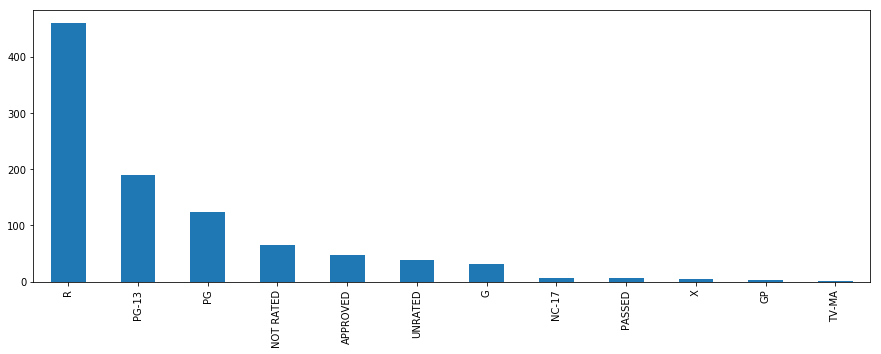

In [27]:
movie_ratings.plot(kind='bar')

In [28]:
# Examinamos las 5 ultimas filas
ufo = pd.read_csv('../data/ufo.csv')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


Los nombres de cada columna deben de tratar de no tener espacios, para ello podemos cambiar el nombre de las columnas de distintas formas como:

In [29]:
# Reemplazar todos los nombres de columnas sobrescribiendo el atributo 'columnas'
ufo_cols = ['city', 'colors_reported', 'shape_reported', 'state', 'time']
ufo.columns = ufo_cols
ufo.head()

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [30]:
# Renombrar dos de las columnas mediante el método 'rename'
ufo.rename(columns={'colors_reported':'Colors_Reported_test', 'shape_reported':'Shape_Reported_test'}, inplace=True)
ufo.head()

,city,Colors_Reported_test,Shape_Reported_test,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


Para remover una columna usamos el método __drop__ :

In [31]:
# Eliminar una columna (axis=1 se refiere a columnas)
ufo.drop('Colors_Reported_test', axis=1, inplace=True)
ufo.head()

,city,Shape_Reported_test,state,time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


In [32]:
# Eliminar varias columnas a la vez
ufo.drop(['state', 'time'], axis=1, inplace=True)
ufo.head()

,city,Shape_Reported_test
0,Ithaca,TRIANGLE
1,Willingboro,OTHER
2,Holyoke,OVAL
3,Abilene,DISK
4,New York Worlds Fair,LIGHT


In [33]:
# Eliminar varias filas a la vez (axis=0 se refiere a filas)
ufo.drop([0, 1], axis=0, inplace=True)
ufo.head()

,city,Shape_Reported_test
2,Holyoke,OVAL
3,Abilene,DISK
4,New York Worlds Fair,LIGHT
5,Valley City,DISK
6,Crater Lake,CIRCLE


### Filtering y Sorting

In [34]:
# Examinamos las 5 primeras filas
movies = pd.read_csv('../data/imdb.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [35]:
# Si queremos ordenar usamos el metodo sort_values()

movies.title.sort_values(ascending=False).head() # En este caso ordenamos de forma descendente

864               [Rec]
526                Zulu
615          Zombieland
677              Zodiac
955    Zero Dark Thirty
Name: title, dtype: object

In [36]:
# Identificamos: los indices se mantienen con cada fila cuando filtramos el dataframe
movies[movies.content_rating=='PG-13'].head()

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


In [37]:
# Ordenar todo el DataFrame por la serie 'title' (devuelve un DataFrame)

movies.sort_values('title').head()

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."


__Objetivo:__ filtrar las filas de DataFrame para mostrar sólo películas con una "duración" de al menos 200 minutos.

In [38]:
is_long = movies.duration >= 200
movies[is_long]

# O de forma equivalente, escríbalo en una línea (no es necesario crear el objeto 'is_long')

movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [39]:
# Selecciona la serie 'genre' del DataFrame filtrado
movies[movies.duration >= 200].genre

# O de forma equivalente, use el método 'loc'
movies.loc[movies.duration >= 200, 'genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

__Meta:__ Filtrar aún más el DataFrame de películas largas (duration> = 200) para mostrar sólo películas que también tienen un 'genre' de 'Drama'

In [40]:
movies[(movies.duration >=200) & (movies.genre == 'Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


__Objetivo:__ Filtrar el DataFrame original para mostrar películas con un 'genre' de 'Crime' o 'Drama' o 'Action' 

In [41]:
# Utiliza el '|' Operador para especificar que una fila puede coincidir con cualquiera de los tres criterios
movies[(movies.genre == 'Crime') | (movies.genre == 'Drama') | (movies.genre == 'Action')].head(10)

# O de forma equivalente, use el método 'isin'
movies[movies.genre.isin(['Crime', 'Drama', 'Action'])].head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


In [42]:
# Lee el dataset de Chipotle orders en un DataFrame

orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [43]:
# Convierte un string a un numero para poder hacer operaciones matemáticas

orders.item_price.str.replace('$', '').astype(float).head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [44]:
# Método string 'contains' checkea si es que hay un substring que contenga 'Chicken' y retorna una serie booleana

orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [45]:
# Convierte una serie booleana a un entero (False = 0 , True = 1)

orders.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int32

### Grouping 

In [46]:
# Lee el dataset de consumo de alcohol en un dataframe

drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [47]:
# Calcula la media de cervezas servidas solo en paises del continente africano

drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [48]:
# Calcula la media de cervezas servidas por cada continente

drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [49]:
# Especificando una columna a la que se debe aplicar la función de agregación no se requiere

drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


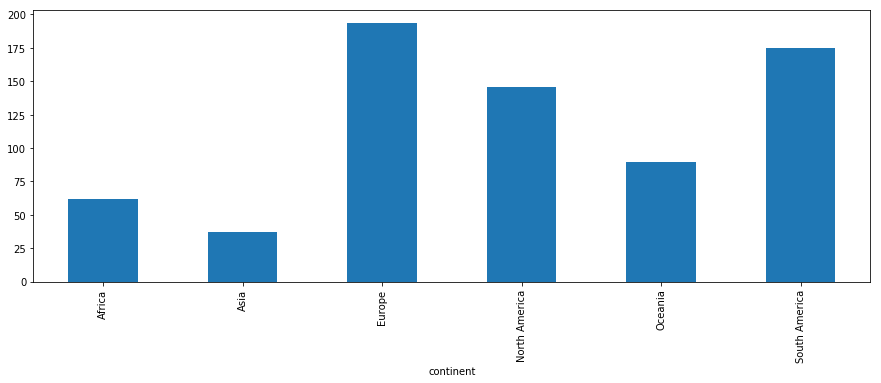

In [50]:
# Diagrama de barras de lado a lado del DataFrame de arriba

drinks.groupby('continent').beer_servings.mean().plot(kind='bar')

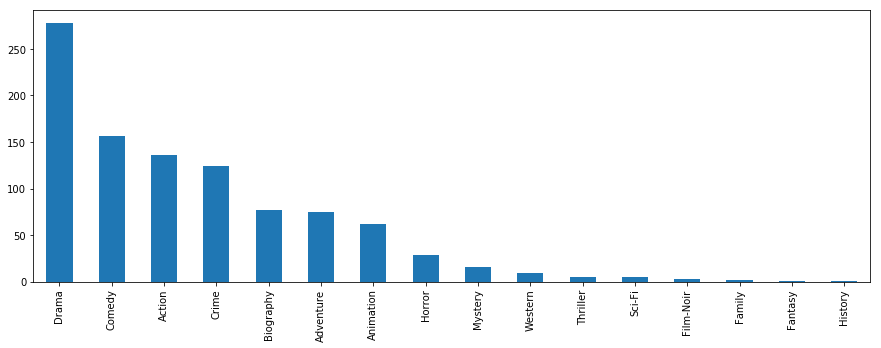

In [51]:
# bar plot of the 'value_counts' for the 'genre' Series
movies.genre.value_counts().plot(kind='bar')

### Manejando Valores perdidos o Missing Values

¿Qué significa "NaN"? 

- "NaN" no es una cadena, sino que es un valor especial: __numpy.nan__. 
- Representa "Not a number" e indica un valor faltante. 
- __read_csv__ detecta los valores perdidos (de forma predeterminada) al leer el archivo y los reemplaza con este valor especial.

In [52]:
# Leyendo el dataset de reportes de avistamientos en un dataframe
ufo = pd.read_csv('../data/ufo.csv')
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [53]:
# Si color reported es null retornara True
ufo['Colors Reported'].isnull().tail()

18236     True
18237     True
18238     True
18239    False
18240     True
Name: Colors Reported, dtype: bool

In [54]:
# Caso contrario retornara False con notnull()
ufo['Colors Reported'].notnull().tail()

18236    False
18237    False
18238    False
18239     True
18240    False
Name: Colors Reported, dtype: bool

In [55]:
# Nos devuelve el dataframe con las columnas vacias de City
ufo[ufo.City.isnull()].head()

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


In [56]:
# Devuelve el numero de filas y columnas
ufo.shape

(18241, 5)

In [57]:
# Si faltan 'algun (any)' valor en una fila entonces elimina esa fila esa fila
ufo.dropna(how='any').shape

(2486, 5)

In [58]:
# Si faltan todos(all) los valores en una fila, entonces elimina esa fila (no se eliminan en este caso)
ufo.dropna(how='all').shape

(18241, 5)

In [59]:
# Si falta algun valor en una fila (teniendo en cuenta sólo 'City' y 'Shape Reported'), entonces se elimina esa fila
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

(15576, 5)

In [60]:
# Si "all" los valores estan faltantes en una filla (considerando solo 'City' y 'Shape Reported') entonces elimina esa fila
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape

(18237, 5)

In [61]:
# 'value_counts' no incluye missing values por defecto
ufo['Shape Reported'].value_counts().head()

LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
CIRCLE      1365
Name: Shape Reported, dtype: int64

In [62]:
# Incluye explícitamente los missing values
ufo['Shape Reported'].value_counts(dropna=False).head()

LIGHT       2803
NaN         2644
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

In [63]:
# Rellenar los valores faltantes con un valor especificado
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)

In [64]:
# Confirmar que los valores faltantes fueron rellenados
ufo['Shape Reported'].value_counts().head()

VARIOUS     2977
LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

### Slicing 

El método __loc__ se utiliza para seleccionar filas y columnas por etiqueta. Puede pasar
: 
- Una etiqueta única 
- Una lista de etiquetas 
- Una porción de etiquetas  
- Una serie booleana 
- Dos puntos (que indica "todas las etiquetas")

In [65]:
# Leyendo la data de crimen cometidos en los EEUU
crime_data = pd.read_csv('../data/crime.csv')
crime_data.head()

,State,Type of Crime,Crime,Year,Count
0,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1960,406
1,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1961,427
2,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1962,316
3,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1963,340
4,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1964,316


In [66]:
# Fila 0, todas las columnas
crime_data.loc[0, :]

State                                         Alabama
Type of Crime                           Violent Crime
Crime            Murder and nonnegligent Manslaughter
Year                                             1960
Count                                             406
Name: 0, dtype: object

In [67]:
# filas 0 , 1 y 2, all columns
crime_data.loc[[0, 1, 2], :]

,State,Type of Crime,Crime,Year,Count
0,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1960,406
1,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1961,427
2,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1962,316


In [68]:
# filas 0 a la 8, all columns
crime_data.loc[0:8 ,  :]

,State,Type of Crime,Crime,Year,Count
0,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1960,406
1,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1961,427
2,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1962,316
3,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1963,340
4,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1964,316
5,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1965,395
6,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1966,384
7,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1967,415
8,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1968,421


In [69]:
# filas 0 a la 3, all columns
crime_data.loc[0:3]

,State,Type of Crime,Crime,Year,Count
0,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1960,406
1,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1961,427
2,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1962,316
3,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1963,340


In [70]:
# filas de la 0 a la 4 (incluyendo) las columnas 'State' y 'Count'
crime_data.loc[0:4, ['State', 'Count']]

,State,Count
0,Alabama,406
1,Alabama,427
2,Alabama,316
3,Alabama,340
4,Alabama,316


El método __iloc__ se utiliza para seleccionar filas y columnas por posición entera. Se puede pasar: 

- Una sola posición entera 
- Una lista de posiciones enteras 
- Una porción de posiciones enteras 
- Dos puntos (que indica "todas las posiciones enteras")

In [71]:
# filas en la posicion 0 al 2 (excluyente) todas las columnas
crime_data.iloc[0:2, :]

,State,Type of Crime,Crime,Year,Count
0,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1960,406
1,Alabama,Violent Crime,Murder and nonnegligent Manslaughter,1961,427


El método __ix__ se utiliza para seleccionar filas y columnas por etiqueta o posición de número entero, y sólo debe utilizarse cuando se necesita mezclar selección basada en etiquetas y enteros en la misma llamada.

Reglas para el uso de números con ix: 

- Si el índice es cadenas, los números se tratan como posiciones enteras, y por lo tanto los cortes son exclusivos a la derecha. 
- Si el índice es números enteros, los números se tratan como etiquetas y, por lo tanto, los cortes son inclusivos.

In [72]:
# Leer el dataset de consumo de alcohol en un DataFrame y establecer 'país' como el índice
drinks = pd.read_csv('http://bit.ly/drinksbycountry', index_col='country')
drinks.head(10)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa
Antigua & Barbuda,102,128,45,4.9,North America
Argentina,193,25,221,8.3,South America
Armenia,21,179,11,3.8,Europe
Australia,261,72,212,10.4,Oceania


In [73]:
# Fila con la etiqueta 'Albania' columna en la posicion 0
drinks.ix['Albania', 0]

89

In [74]:
# fila en la posicion 1, columna con etiqueta 'beer_servings'
drinks.ix[1, 'beer_servings']

89

In [75]:
# Filas 'Albania' hasta 'Andorra' (inclusiva), columnas en la posicion 0 hasta 2 (exclusiva)
drinks.ix['Albania':'Andorra', 0:2]

,beer_servings,spirit_servings
country,,
Albania,89,132
Algeria,25,0
Andorra,245,138


__ Entonces... ¿Cuáles son las diferencias entre loc, iloc, e ix? veamos... __

Usemos la vieja confiable para contestar esta pregunta, es bueno buscar preguntas en internet ya que es imposible memorizar tantos metodos... ;) 

http://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation

### Apply

Podemos aplicar funciones a data series:

In [76]:
def alcoholics(x):
    if x > 10:
        return 'alcoholics!'
    else:
        return 'Sober people'

In [77]:
drinks['Kind of people'] = drinks['total_litres_of_pure_alcohol'].apply(alcoholics)
drinks.head(10)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,Kind of people
country,,,,,,
Afghanistan,0,0,0,0.0,Asia,Sober people
Albania,89,132,54,4.9,Europe,Sober people
Algeria,25,0,14,0.7,Africa,Sober people
Andorra,245,138,312,12.4,Europe,alcoholics!
Angola,217,57,45,5.9,Africa,Sober people
Antigua & Barbuda,102,128,45,4.9,North America,Sober people
Argentina,193,25,221,8.3,South America,Sober people
Armenia,21,179,11,3.8,Europe,Sober people
Australia,261,72,212,10.4,Oceania,alcoholics!


### Creación de Dummy Variables

En general: 
- Si tiene __"K" posibles valores__ para una característica categórica, sólo necesita __"K-1" dummy variables __ para capturar toda la información sobre esa característica. 
- Una convención es __eliminar la primera variable ficticia__, que define ese nivel como la "baseline".

In [78]:
# Leyendo la data de crimen cometidos en los EEUU
titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
# create the 'Sex_male' dummy variable using the 'map' method
titanic['Sex_male'] = titanic.Sex.map({'female':0, 'male':1})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [80]:
pd.get_dummies(titanic.Sex).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [81]:
# Eliminamos la primera first dummy variable ('female') usando el metodo iloc
pd.get_dummies(titanic.Sex, prefix='Sex').iloc[:, 1:].head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [82]:
# Usando 'get_dummies' Con una característica que tiene 3 valores posibles
pd.get_dummies(titanic.Embarked, prefix='Embarked').head(5)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [83]:
# Eliminamos la primera dummy variable ('C')

pd.get_dummies(titanic.Embarked, prefix='Embarked').iloc[:, 1:].head(5)

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Cómo traducir estos valores de nuevo al valor original __'Embarked'__:
* 0, 0 significa C
* 1, 0 significa Q
* 0, 1 significa S

In [84]:
# Pasa el DataFrame a 'get_dummies' y especifica qué columnas a dummy (descarta las columnas originales)

titanic = pd.read_csv('../data/titanic.csv')
pd.get_dummies(titanic, columns=['Sex', 'Embarked']).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [85]:
# Utiliza el parámetro 'drop_first' (nuevo en pandas 0.18) para eliminar la primera variable dummy para cada característica

pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


### Time Series

In [86]:
# Leyendo el dataset de reportes de avistamientos en un dataframe
ufo = pd.read_csv('../data/ufo.csv')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [87]:
# Hora se puede acceder usando el corte de cadena, pero este enfoque se rompe con demasiada facilidad
ufo.Time.str.slice(-5, -3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [88]:
# Convierte 'Time' a un datetime format
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Time'].head()

0   1930-06-01 22:00:00
1   1930-06-30 20:00:00
2   1931-02-15 14:00:00
3   1931-06-01 13:00:00
4   1933-04-18 19:00:00
Name: Time, dtype: datetime64[ns]

In [89]:
# Convertir una sola cadena al formato datetime (sale un objeto timestamp)

ts = pd.to_datetime('1/1/1999')

In [90]:
# Comparar una serie de fecha y hora con una marca de tiempo
ufo.loc[ufo.Time >= ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [91]:
# Cuenta el numero de avistamientos de ovnis por año

ufo['Year'] = ufo.Time.dt.year
ufo['Year'].head()

0    1930
1    1930
2    1931
3    1931
4    1933
Name: Year, dtype: int64

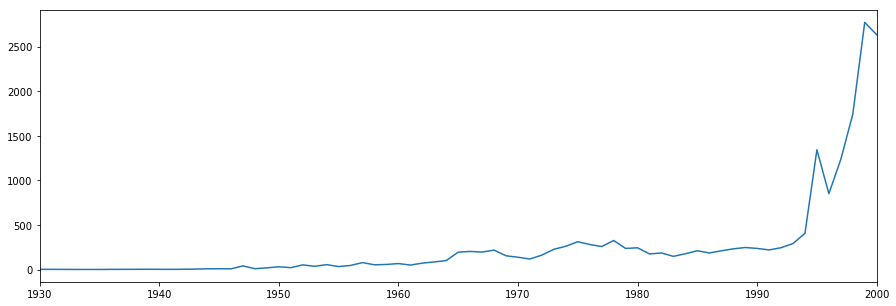

In [92]:
# Grafica el número de informes de OVNI por año

ufo.Year.value_counts().sort_index().plot()

In [93]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/StyleCursoPython.css'
HTML(open(css_file, "r").read())